In [1]:
import random
import pandas as pd
import numpy as np
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from deap import base
from deap import creator
from deap import tools
import seaborn as sns
import matplotlib.pyplot as plt
import timeit

In [2]:
data  = pd.read_csv('C:/Users/Amir Hossein/Desktop/Project/dataset/My-Data.csv')
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
y = pd.DataFrame(y)

In [3]:
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import TransformedTargetRegressor


class GenGBM:

    def __init__(self, X, y):
        
        
        self.X = X
        self.y = y


        # split the data, creating a group of training/validation sets to be used in the k-fold validation process:
#         self.kfold = KFold(n_splits=3)

        pipeline = Pipeline([("scaler", StandardScaler()),
                             ("model", GradientBoostingRegressor())])
        self.model = TransformedTargetRegressor(regressor=pipeline, transformer=StandardScaler())
        self.RKFold = RepeatedKFold(n_splits=5, n_repeats=5, random_state=42)

    def __len__(self):
        """
        :return: the total number of features used in this Regression problem
        """
        return self.X.shape[1]

    def getMeanR2(self, zeroOneList):
        """
        returns the mean r2 measure of the regressor, calculated using repeated-k-fold validation process,
        using the features selected by the zeroOneList
        :param zeroOneList: a list of binary values corresponding the features in the dataset. A value of '1'
        represents selecting the corresponding feature, while a value of '0' means that the feature is dropped.
        :return: the mean R2 measure of the Regressor when using the features selected by the zeroOneList
        """

        # drop the dataset columns that correspond to the unselected features:
        zeroIndices = [i for i, n in enumerate(zeroOneList) if n == 0]
        currentX = self.X.drop(self.X.columns[zeroIndices], axis=1)

        # perform k-fold validation and determine the accuracy measure of the classifier:
        cv_results = cross_val_score(self.model, currentX, self.y, cv=5, scoring='r2', n_jobs=-1)

        # return mean accuracy:
        return np.mean(cv_results)

def main():
    # create a problem instance:
    gbm = GenGBM(X, y)

    allOnes = [1] * len(gbm)
    print("-- All features selected: ", allOnes, ", r2 = ", gbm.getMeanR2(allOnes))


if __name__ == "__main__":
    main()

-- All features selected:  [1, 1, 1, 1, 1] , r2 =  0.9069196703264261


In [5]:
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import TransformedTargetRegressor


class GenGBM:

    def __init__(self, X, y):
        
        
        self.X = X
        self.y = y


        # split the data, creating a group of training/validation sets to be used in the k-fold validation process:
#         self.kfold = KFold(n_splits=3)

        pipeline = Pipeline([("scaler", StandardScaler()),
                             ("model", GradientBoostingRegressor())])
        self.model = TransformedTargetRegressor(regressor=pipeline, transformer=StandardScaler())
        self.RKFold = RepeatedKFold(n_splits=5, n_repeats=5, random_state=42)

    def __len__(self):
        """
        :return: the total number of features used in this Regression problem
        """
        return self.X.shape[1]

    def getMeanR2(self, zeroOneList):
        """
        returns the mean r2 measure of the regressor, calculated using repeated-k-fold validation process,
        using the features selected by the zeroOneList
        :param zeroOneList: a list of binary values corresponding the features in the dataset. A value of '1'
        represents selecting the corresponding feature, while a value of '0' means that the feature is dropped.
        :return: the mean R2 measure of the Regressor when using the features selected by the zeroOneList
        """

        # drop the dataset columns that correspond to the unselected features:
        zeroIndices = [i for i, n in enumerate(zeroOneList) if n == 0]
        currentX = self.X.drop(self.X.columns[zeroIndices], axis=1)

        # perform k-fold validation and determine the accuracy measure of the classifier:
        cv_results = cross_val_score(self.model, currentX, self.y, cv=5, scoring='r2', n_jobs=-1)

        # return mean accuracy:
        return np.mean(cv_results)

def main():
    # create a problem instance:
    lr = GenGBM(X, y)

    allOnes = [1] * len(gbm)
    print("-- All features selected: ", allOnes, ", r2 = ", gbm.getMeanR2(allOnes))


if __name__ == "__main__":
    main()

gen	nevals	max     	avg     
0  	50    	0.906807	0.548025 24.09783390001394
Time:  24.09783390001394
1  	20    	0.907205	0.650666
Time:  12.625709099927917
2  	20    	0.907008	0.68831 
Time:  17.567919499939308
3  	20    	0.907182	0.708419
Time:  17.56175859994255
4  	23    	0.907071	0.723942
Time:  21.666194499935955
5  	22    	0.907276	0.705784
Time:  15.462861299980432
6  	18    	0.907148	0.721249
Time:  14.47305679996498
7  	26    	0.907106	0.740892
Time:  22.66675930004567
8  	27    	0.907195	0.739158
Time:  20.18073650007136
9  	27    	0.907214	0.725158
Time:  22.64126139995642
10 	29    	0.907006	0.740702
Time:  28.232272800058126
11 	28    	0.907217	0.741957
Time:  21.26694589992985
12 	30    	0.907193	0.737307
Time:  20.847709799883887
13 	31    	0.906989	0.742686
Time:  21.464133800007403
14 	33    	0.907137	0.746177
Time:  26.973715600091964
15 	29    	0.907357	0.752172
Time:  22.489170699846
16 	31    	0.907132	0.754813
Time:  32.44251630012877
17 	33    	0.907261	0.758764


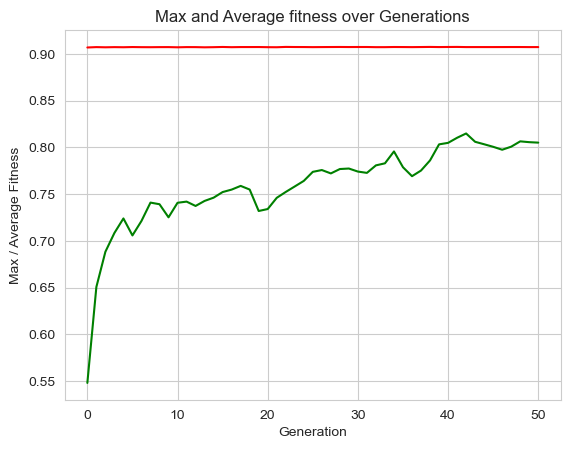

In [5]:
from deap import base, tools, algorithms, creator
from elitism import eaSimpleWithElitism
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Genetic Algorithm constants:
POPULATION_SIZE = 50
P_CROSSOVER = 0.9  # probability for crossover
P_MUTATION = 0.5   # probability for mutating an individual
MAX_GENERATIONS = 50
FEATURE_PENALTY_FACTOR = 0.001
HALL_OF_FAME_SIZE = 30

# set the random seed:
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
all_time = list()
toolbox = base.Toolbox()

# X, y = get_data(GSO_FLOW)
now = timeit.default_timer()
tree =GenGBM(X, y)

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox.register("zeroOrOne", random.randint, a=0, b=1)
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.zeroOrOne, len(tree))
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

def getR2(individual):
    numFeatureUsed = sum(individual)
    if numFeatureUsed == 0:
        return 0.0,
    else:
        r2_score = tree.getMeanR2(individual)
        return r2_score,

toolbox.register("evaluate", getR2)

toolbox.register("select", tools.selTournament, tournsize=2)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/276)

population = toolbox.populationCreator(n=POPULATION_SIZE)

stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("max", np.max)
stats.register("avg", np.mean)

# define the hall-of-fame object:
hof = tools.HallOfFame(HALL_OF_FAME_SIZE)
    
population, logbook = eaSimpleWithElitism(population, toolbox,
                                          cxpb=P_CROSSOVER,
                                          mutpb=P_MUTATION,
                                          ngen=MAX_GENERATIONS,
                                          stats=stats,
                                          halloffame=hof,
                                          verbose=True)

print("- Best solutions are:")
for i in range(5):
    print(i, ": ", hof.items[i], ", fitness = ", hof.items[i].fitness.values[0],
          ", R2Score = ", tree.getMeanR2(hof.items[i]), ", features = ", sum(hof.items[i]))
duration = timeit.default_timer() - now
all_time.append(duration)
print("Total Time Consumed: %.3f minutes" % float(sum(all_time)/60))
maxFitnessValues, meanFitnessValues = logbook.select("max", "avg")
sns.set_style("whitegrid")
plt.plot(maxFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Generation')
plt.ylabel('Max / Average Fitness')
plt.title('Max and Average fitness over Generations')
plt.savefig("C:/Users/Amir Hossein/Desktop/Project/Figures//ga_gbm", dpi=1000)
plt.show()